# Week 2 - Heart Disease Data Analysis
In this notebook we analyse and prepare data on patients screened for heart disease.

## Import packages

In [109]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Loading the data
We have been given two files. Let's load them and inspect them.

In [120]:
df1 = pd.read_csv("data/heart.csv", encoding='utf-8-sig')
df1.head(5)

,id,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
df2 = pd.read_csv('data/heart_demo.csv', encoding='utf-8-sig')
df2.head(5)

,id,age,sex
0,1,63,1
1,2,37,1
2,3,41,0
3,4,56,1
4,5,57,0


It looks like the first file contains measurements from patients and the second file contains demographic data. Both files have an `id` column. Let's use this to join the dataframes.

In [122]:
df3 = pd.merge(df1, df2, on='id', how='inner')
df3.head(5)

,id,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,63,1
1,2,2,130,250,0,1,187,0,3.5,0,0,2,1,37,1
2,3,1,130,204,0,0,172,0,1.4,2,0,2,1,41,0
3,4,1,120,236,0,1,178,0,0.8,2,0,2,1,56,1
4,5,0,120,354,0,1,163,1,0.6,2,0,2,1,57,0


The following is a feature description for the dataset.

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value  4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

To make it easier to work with, we will rename the columns to something that is easier to remember.

In [123]:
new_name = {
    'cp': 'chest_pain_type',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'ca': 'major_vessels',
    'thal': 'thalassemia'
}

df3.rename(columns=new_name, inplace=True)
df3.head(5)

,id,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thalassemia,target,age,sex
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,63,1
1,2,2,130,250,0,1,187,0,3.5,0,0,2,1,37,1
2,3,1,130,204,0,0,172,0,1.4,2,0,2,1,41,0
3,4,1,120,236,0,1,178,0,0.8,2,0,2,1,56,1
4,5,0,120,354,0,1,163,1,0.6,2,0,2,1,57,0


## Step 2: Inspecting the data
First we inspect the data types of the features. 

The distribution of the target may influence how we prepare the date for modelling.

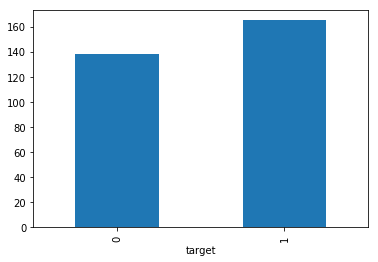

In [124]:
target_data = df3.groupby('target')['id'].count()
target_data.plot(kind='bar')

What is the age distribution of people participating in the study?

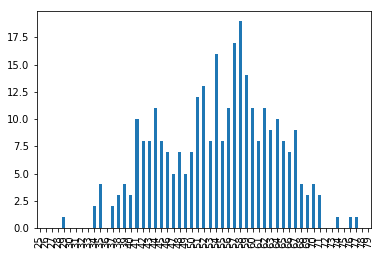

In [144]:
age_data = df3['age'].value_counts().sort_index().reindex(np.arange(25, 80), fill_value=0)
age_data.plot(kind='bar')

We can visualize other features. Here it is cholesterol.

(array([ 2.,  1.,  2.,  2.,  5., 11.,  7.,  9., 24., 22., 18., 23., 22.,
        23., 20., 18., 18., 14.,  9., 10., 15.,  6.,  7.,  4.,  3.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126.  , 134.76, 143.52, 152.28, 161.04, 169.8 , 178.56, 187.32,
        196.08, 204.84, 213.6 , 222.36, 231.12, 239.88, 248.64, 257.4 ,
        266.16, 274.92, 283.68, 292.44, 301.2 , 309.96, 318.72, 327.48,
        336.24, 345.  , 353.76, 362.52, 371.28, 380.04, 388.8 , 397.56,
        406.32, 415.08, 423.84, 432.6 , 441.36, 450.12, 458.88, 467.64,
        476.4 , 485.16, 493.92, 502.68, 511.44, 520.2 , 528.96, 537.72,
        546.48, 555.24, 564.  ]),
 <a list of 50 Patch objects>)

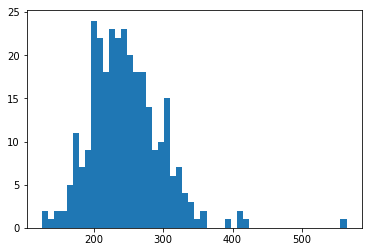

In [78]:
plt.hist(df3['cholesterol'], bins=50)

Suppose you want to compute the mean heart rate. Pandas makes it easy.

In [145]:
df3['max_heart_rate'].mean()

149.64686468646866

## Step 3: Preparing the data for modelling
We want to remove columns that we don't need. An index column serves no purpose in a model, so we discard it.

In [48]:
to_drop = ['id'] # We can specify multiple columns in this array if needed

df3.drop(to_drop, inplace=True, axis=1)

Let's inspect the datatypes of the dataset.

In [49]:
df3.dtypes

chest_pain_type              int64
trestbps                     int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
oldpeak                    float64
slope                        int64
major_vessels                int64
thalassemia                  int64
target                       int64
﻿age                         int64
sex                          int64
dtype: object

This is not quite right. Some of the features are modelled with integer values even though they are in fact categorical features.

For example
- Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

We want to convert these to categorical features.

In [51]:
df3['sex'][df3['sex'] == 0] = 'female'
df3['sex'][df3['sex'] == 1] = 'male'

df3['chest_pain_type'][df3['chest_pain_type'] == 1] = 'typical angina'
df3['chest_pain_type'][df3['chest_pain_type'] == 2] = 'atypical angina'
df3['chest_pain_type'][df3['chest_pain_type'] == 3] = 'non-anginal pain'
df3['chest_pain_type'][df3['chest_pain_type'] == 4] = 'asymptomatic'

df3['fasting_blood_sugar'][df3['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df3['fasting_blood_sugar'][df3['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df3['rest_ecg'][df3['rest_ecg'] == 0] = 'normal'
df3['rest_ecg'][df3['rest_ecg'] == 1] = 'ST-T wave abnormality'
df3['rest_ecg'][df3['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df3['exercise_induced_angina'][df3['exercise_induced_angina'] == 0] = 'no'
df3['exercise_induced_angina'][df3['exercise_induced_angina'] == 1] = 'yes'

df3['slope'][df3['slope'] == 1] = 'upsloping'
df3['slope'][df3['slope'] == 2] = 'flat'
df3['slope'][df3['slope'] == 3] = 'downsloping'

df3['thalassemia'][df3['thalassemia'] == 1] = 'normal'
df3['thalassemia'][df3['thalassemia'] == 2] = 'fixed defect'
df3['thalassemia'][df3['thalassemia'] == 3] = 'reversable defect'

df3.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWi

,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thalassemia,target,﻿age,sex
0,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1,63,male
1,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1,37,male
2,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1,41,female
3,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1,56,male
4,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1,57,female


Some models, like linear regression, do not know how to work with categorical features. A workaround for this is to apply one-hot encoding. This will create a feature for each value of the categorical feature. In Pandas, this is straightforward.

In [54]:
df3 = pd.get_dummies(df3)
df3.head(5)

,trestbps,cholesterol,max_heart_rate,oldpeak,major_vessels,target,﻿age,chest_pain_type_0,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,exercise_induced_angina_yes,slope_0,slope_flat,slope_upsloping,thalassemia_0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,sex_female,sex_male
0,145,233,150,2.3,0,1,63,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,130,250,187,3.5,0,1,37,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,130,204,172,1.4,0,1,41,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,120,236,178,0.8,0,1,56,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,120,354,163,0.6,0,1,57,1,0,0,...,1,0,1,0,0,1,0,0,1,0
